# Exercitiu 4 - Tema 2

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wf
import scipy.signal as sg
import math
import sounddevice as sd
from scipy.ndimage import gaussian_filter
import scipy.signal as signal

In [60]:
frq, mix = wf.read('data/mega_mix.wav')
_, bass = wf.read('data/ps-lab-3-bass.wav')
_, drums = wf.read('data/ps-lab-3-drums.wav')
_, guitar = wf.read('data/ps-lab-3-guitar.wav')
_, keyboard = wf.read('data/ps-lab-3-keyboard.wav')

time = 4
nr_samples = int(frq*time)

mix = mix[:nr_samples]
bass = bass[:nr_samples]
drums = drums[:nr_samples]
guitar = guitar[:nr_samples]
keyboard = keyboard[:nr_samples]

In [61]:
def transform_to_fft(sound):
    if len(sound.shape) != 1:
        sound = np.average(sound, axis=1)
    sound = signal.filtfilt(*signal.butter(10, 0.4, btype='low'), sound)
    sound_fft = np.fft.fft(sound)
    sound_fft = np.abs(sound_fft[:len(sound_fft) // 2])
    # sound_fft = gaussian_filter(sound_fft, sigma=10)
    return sound_fft

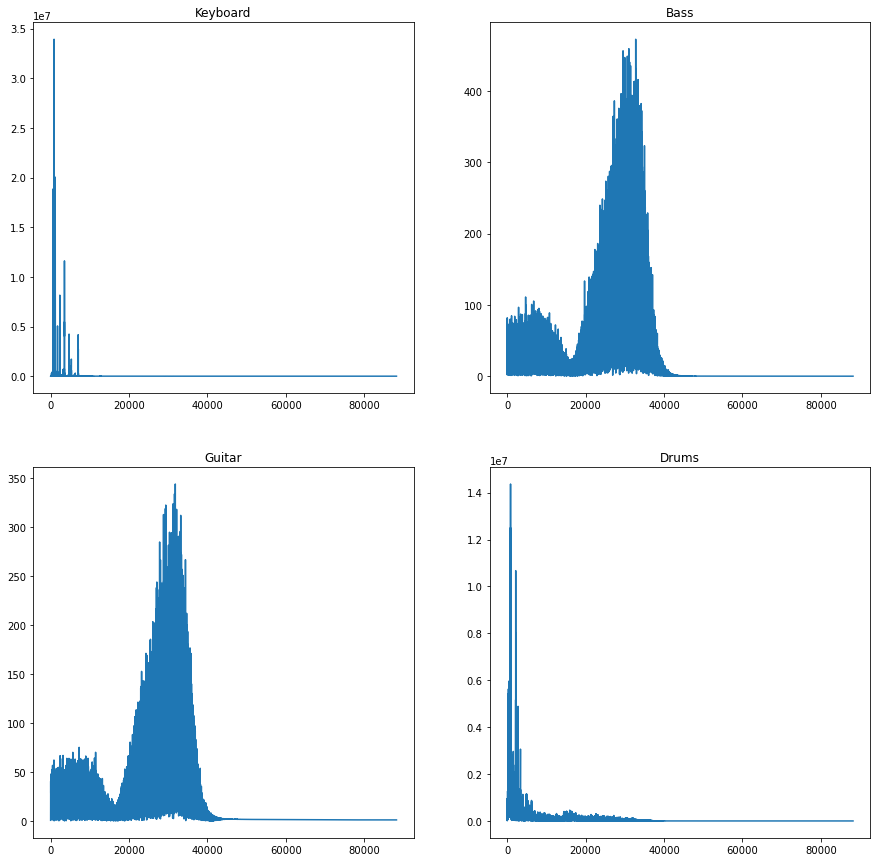

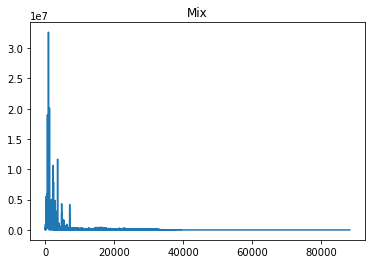

In [62]:
fig, ax = plt.subplots(nrows=2, ncols=2)

ax[0][0].plot(transform_to_fft(keyboard))
ax[0][0].set_title("Keyboard")

ax[0][1].plot(transform_to_fft(bass))
ax[0][1].set_title("Bass")

ax[1][0].plot(transform_to_fft(guitar))
ax[1][0].set_title("Guitar")

ax[1][1].plot(transform_to_fft(drums))
ax[1][1].set_title("Drums")

fig.set_figwidth(15)
fig.set_figheight(15)

plt.show()

plt.plot(transform_to_fft(mix))
plt.title("Mix")
plt.show()

In [31]:
sd.default.samplerate = frq
wav_wave = np.array(mix, dtype=np.int16)
sd.play(wav_wave, blocking=True)
sd.stop()